# Board Level Strategic Insight Request
## Data Analyst: Jenny Rose Montille
## Date of Request: September 26, 2025

Scenario

A mid-sized financial institution has been actively expanding its personal loan portfolio. However, recent shifts in customer behavior and credit risk profiles have prompted the Board of Directors to revisit the underlying factors influencing loan approvals and amounts granted. The board is particularly concerned with credit risk, profitability, and data-driven decision-making.

During a quarterly strategy meeting, the Chief Risk Officer (CRO) presents a dashboard highlighting inconsistencies in the average loan amounts issued across customer segments. Some applicants with moderate income and lower credit scores are receiving higher-than-expected loan amounts, while more qualified applicants appear to be under-leveraged.

In response, the Chairperson of the Board raises a crucial question:

"Among all the customer attributes we’ve been collecting—like income, credit score, employment history, age, debt-to-income ratio, and education level—can we clearly identify which of these factors have the strongest statistical relationship with the loan amount issued?"

The board mandates the Data Analytics Team to conduct an immediate correlation analysis to:

1. Identify which factors most strongly drive loan amounts.

2. Distinguish between statistically significant vs. insignificant variables.

3. Support future decisions about automating loan approvals, tightening risk thresholds, or tailoring products to specific customer profiles.

Create a Business Analytics Report that address the request of the board.

In [2]:
pip install qdesc

In [4]:
pip install researchpy

In [5]:
import pandas as pd
import numpy as np
import qdesc as qd
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel("HypotheticalLoansData.xlsx")
df.head(5)

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,EducationLevel,LoanAmount
0,67450.71,746.31,22,0.27,48,Bachelor,105119.57
1,57926.04,795.47,11,0.38,59,Bachelor,104818.75
2,69715.33,630.07,16,0.37,26,Bachelor,99397.74
3,82845.45,728.15,7,0.23,29,High School,99163.53
4,56487.70,667.47,10,0.38,40,High School,80141.29


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           500 non-null    float64
 1   CreditScore      500 non-null    float64
 2   EmploymentYears  500 non-null    int64  
 3   DebtToIncome     500 non-null    float64
 4   Age              500 non-null    int64  
 5   EducationLevel   500 non-null    object 
 6   LoanAmount       500 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB


In [10]:
df.isnull().values.any()

np.False_

**Descriptive Analysis**

In [9]:
df.describe()

,Income,CreditScore,EmploymentYears,DebtToIncome,Age,LoanAmount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,60102.569780,701.591200,14.312000,0.298900,42.544000,87561.532960
std,14718.798391,48.900041,8.517026,0.096851,12.714219,13021.297761
min,11380.990000,565.160000,0.000000,0.010000,21.000000,53960.780000
25%,49495.390000,670.235000,7.000000,0.230000,31.750000,78285.482500
50%,60191.960000,701.430000,14.000000,0.300000,42.500000,87579.970000
75%,69551.752500,732.562500,22.000000,0.360000,54.000000,96888.517500
max,117790.970000,831.620000,29.000000,0.570000,64.000000,119076.870000


The descriptive analysis of the dataset reveals that applicants have diverse financial and demographic profiles. Income levels range widely, with an average of about 60,103, suggesting the institution serves both lower- and higher-income clients. Credit scores also vary significantly, averaging around 702 but spanning from 565 to 832, which indicates the inclusion of borrowers that were likely to pay their loan. Employment history averages 14 years, but values range from zero to nearly three decades, highlighting a mix of early-career individuals and those with long employment years. The debt-to-income ratio is fairly stable, averaging 0.30, with most applicants falling within acceptable risk levels, although some are approaching higher-risk thresholds above 0.5. Age distribution centers around 43 years, with applicants ranging from 21 to 64, covering young adults through near-retirement borrowers. Loan amounts granted average roughly 87,562, with noticeable variation across applicants. Overall, the spread across income, credit scores, and loan amounts points to potential inconsistencies in loan approvals that needs deeper correlation analysis to identify the strongest drivers of lending decisions.

Normality Check for Analysis


--- Variable: Income ---
  Anderson-Darling Statistic : 0.2978
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


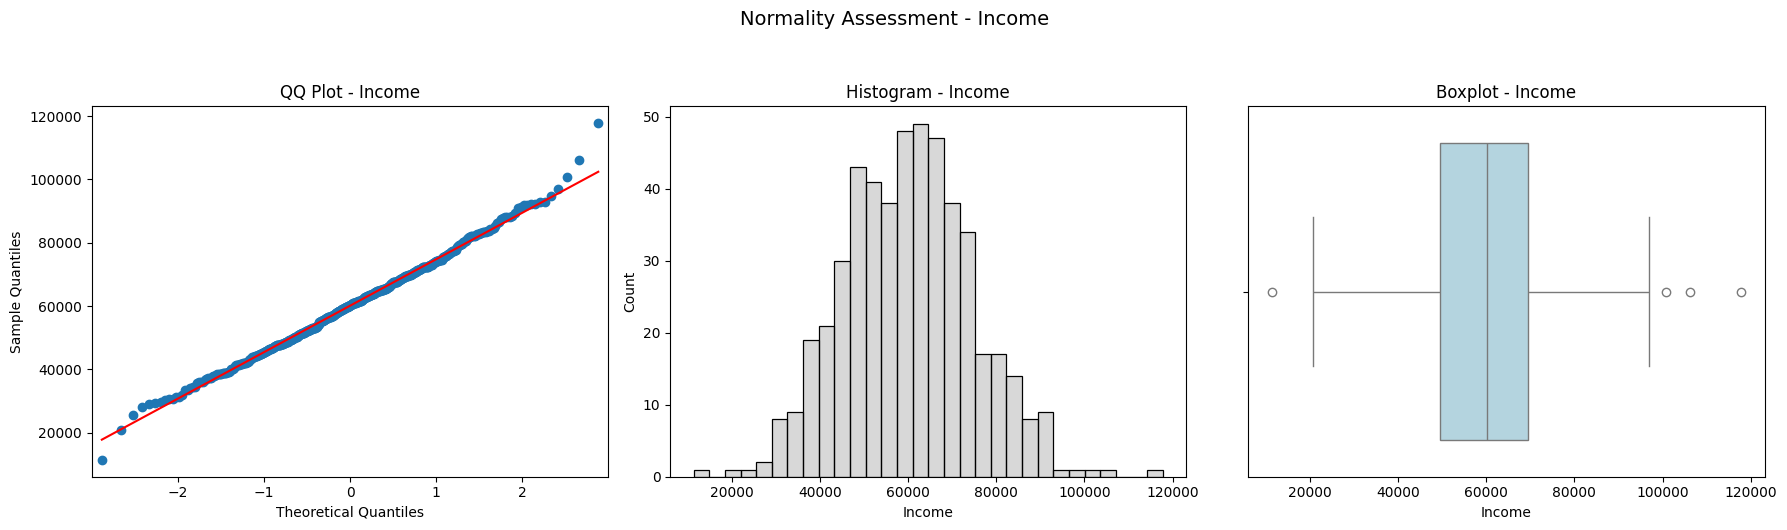


--- Variable: CreditScore ---
  Anderson-Darling Statistic : 0.2349
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


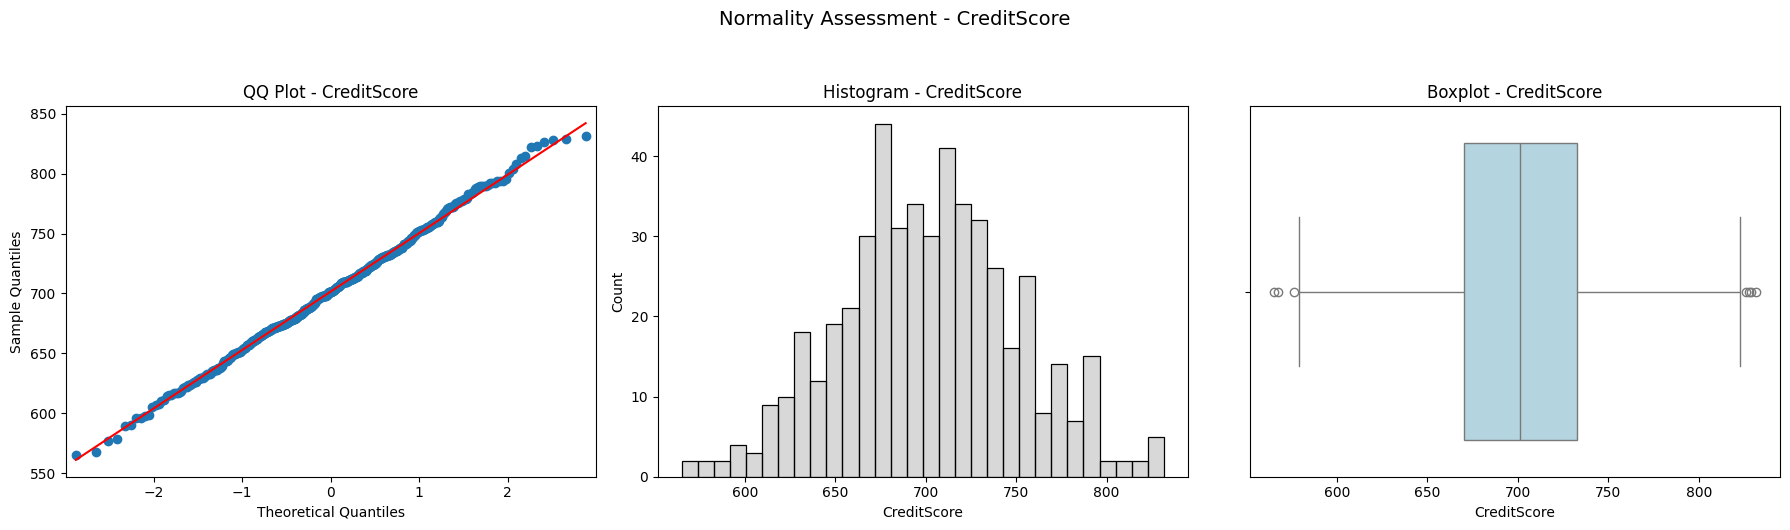


--- Variable: EmploymentYears ---
  Anderson-Darling Statistic : 5.2192
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


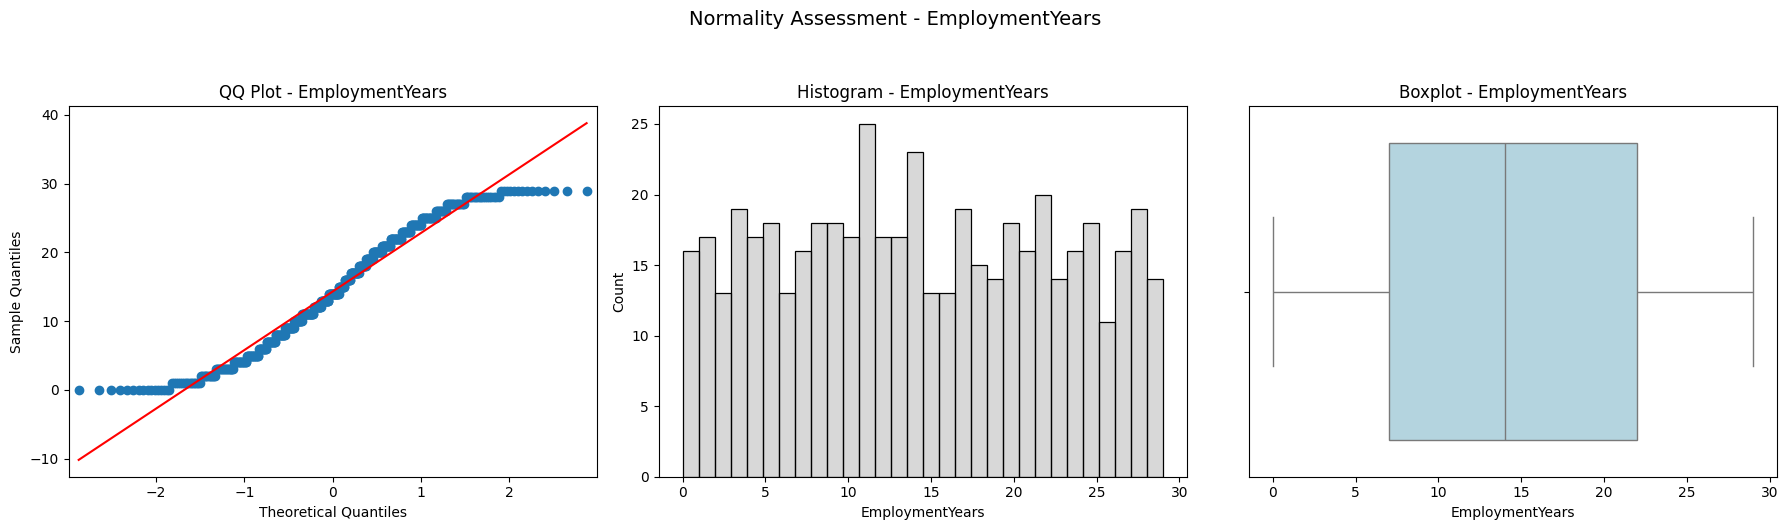


--- Variable: DebtToIncome ---
  Anderson-Darling Statistic : 0.4250
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


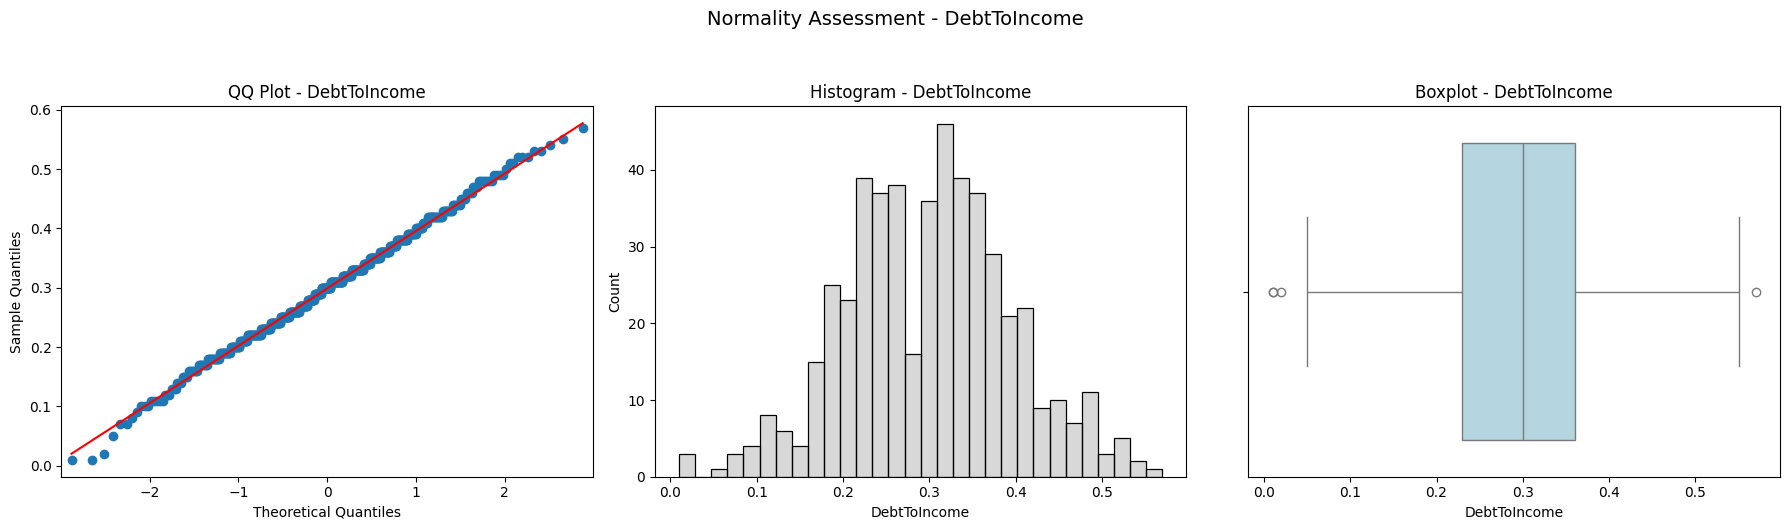


--- Variable: Age ---
  Anderson-Darling Statistic : 6.4294
  Critical Value (@ 5.0%) : 0.7810
  Decision : Reject Null


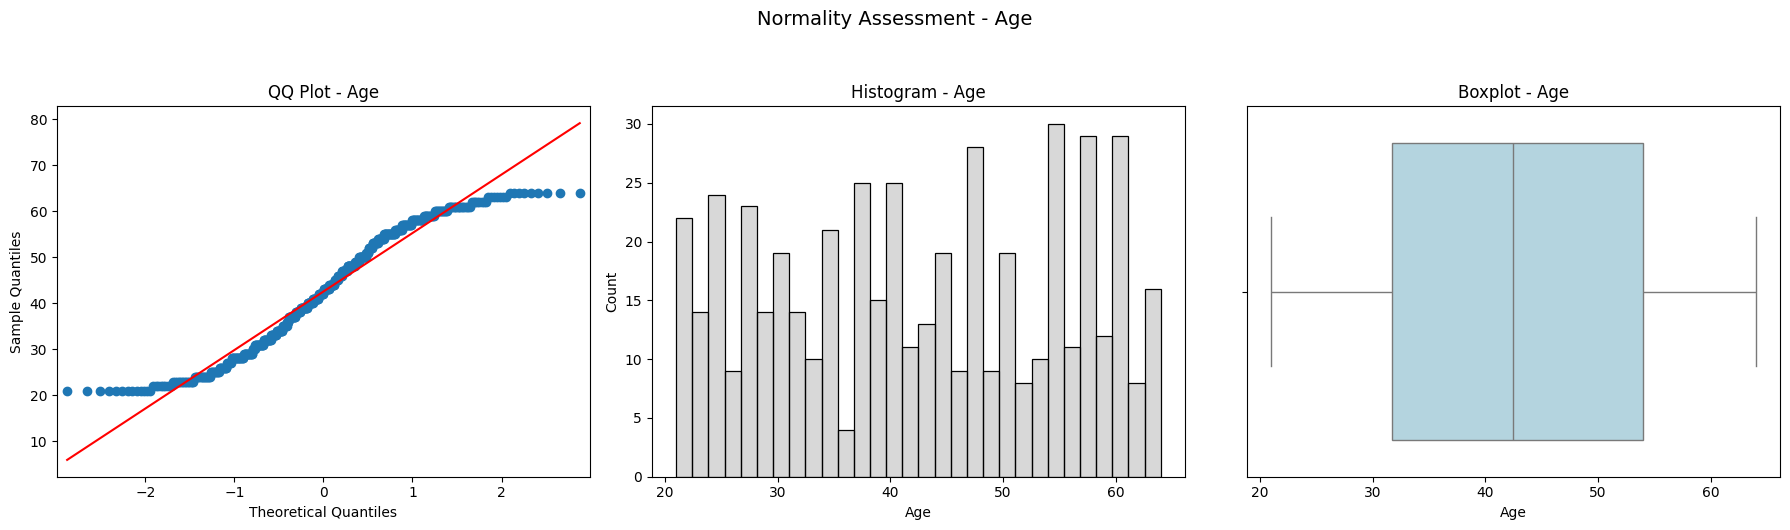


--- Variable: LoanAmount ---
  Anderson-Darling Statistic : 0.2794
  Critical Value (@ 5.0%) : 0.7810
  Decision : Fail to Reject Null


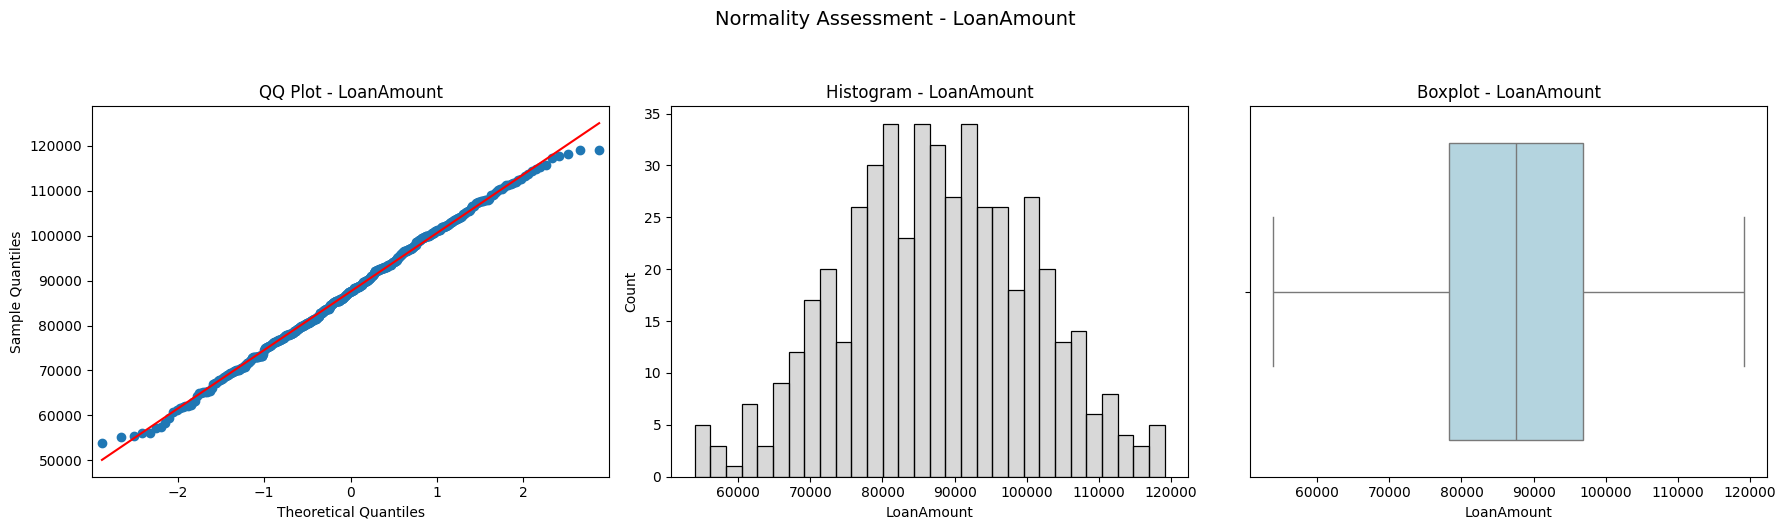

In [14]:
qd.normcheck_dashboard(df)

Correlation Analysis

In [23]:
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

In [25]:
# Target variable
target = "LoanAmount"

# Variables classified by normality test
normal_vars = ["Income", "CreditScore", "DebtToIncome"]
non_normal_vars = ["EmploymentYears", "Age"]

print("*Pearson Correlation (Normal Variables)*")
for col in normal_vars:
    r, p = pearsonr(df[col], df[target])
    print(f"{col} vs {target}: r = {r:.3f}, p-value = {p:.4f}")

print("\n *Spearman Correlation (Non-Normal Variables)*")
for col in non_normal_vars:
    r, p = spearmanr(df[col], df[target])
    print(f"{col} vs {target}: r = {r:.3f}, p-value = {p:.4f}")

*Pearson Correlation (Normal Variables)*
Income vs LoanAmount: r = 0.241, p-value = 0.0000
CreditScore vs LoanAmount: r = 0.344, p-value = 0.0000
DebtToIncome vs LoanAmount: r = -0.212, p-value = 0.0000

 *Spearman Correlation (Non-Normal Variables)*
EmploymentYears vs LoanAmount: r = 0.301, p-value = 0.0000
Age vs LoanAmount: r = -0.038, p-value = 0.4008


The correlation results reveal several important drivers of loan amounts. Among the normally distributed variables, credit score (r = 0.344, p < 0.001) shows the strongest positive correlation with loan amount, suggesting that applicants with higher credit scores are more likely to be granted larger loans. Income (r = 0.241, p < 0.001) also has a significant positive relationship, indicating that higher-income borrowers tend to receive slightly higher loan amounts. In contrast, the debt-to-income ratio (r = -0.212, p < 0.001) has a significant negative correlation, meaning that applicants with higher debt burdens relative to income are typically approved for lower loan amounts.

For the non-normal variables, employment years (r = 0.301, p < 0.001) shows a meaningful positive relationship with loan amount, highlighting that longer work histories increase borrowing capacity. However, age (r = -0.038, p = 0.4008) shows no statistically significant relationship, indicating that age is not a factor in determining loan size.